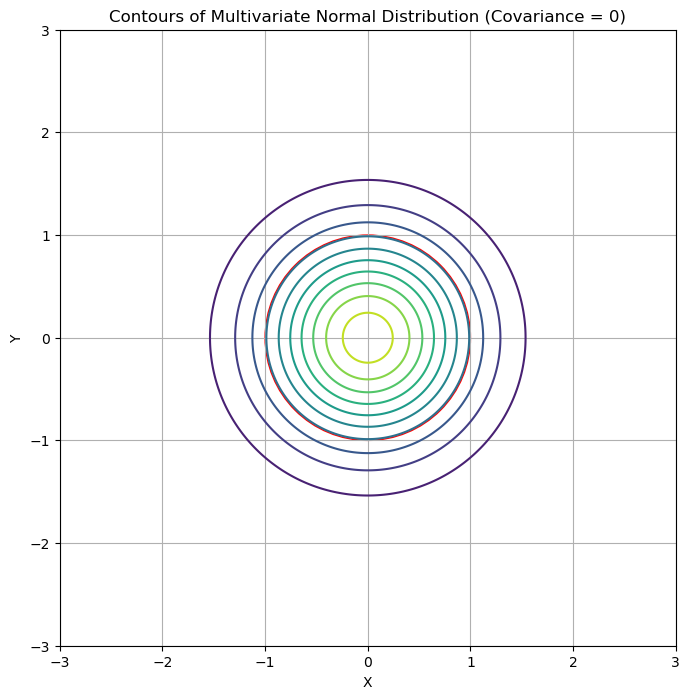

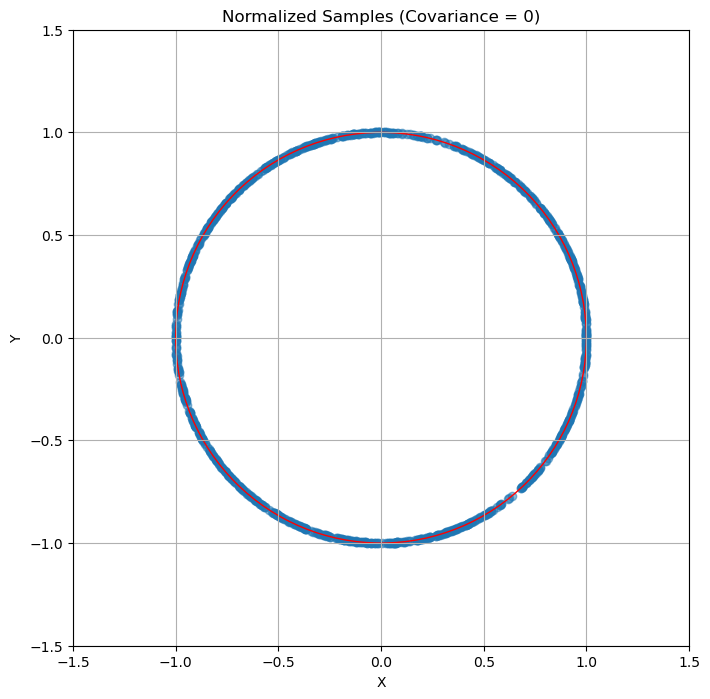

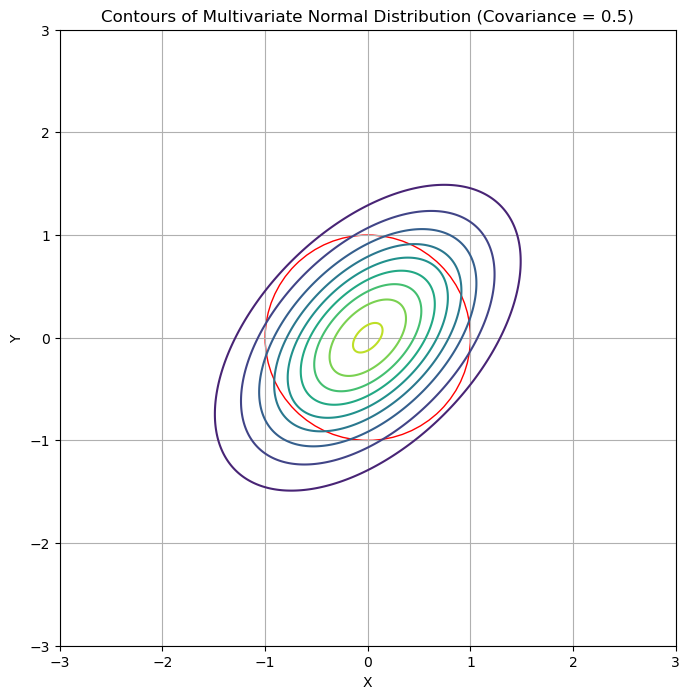

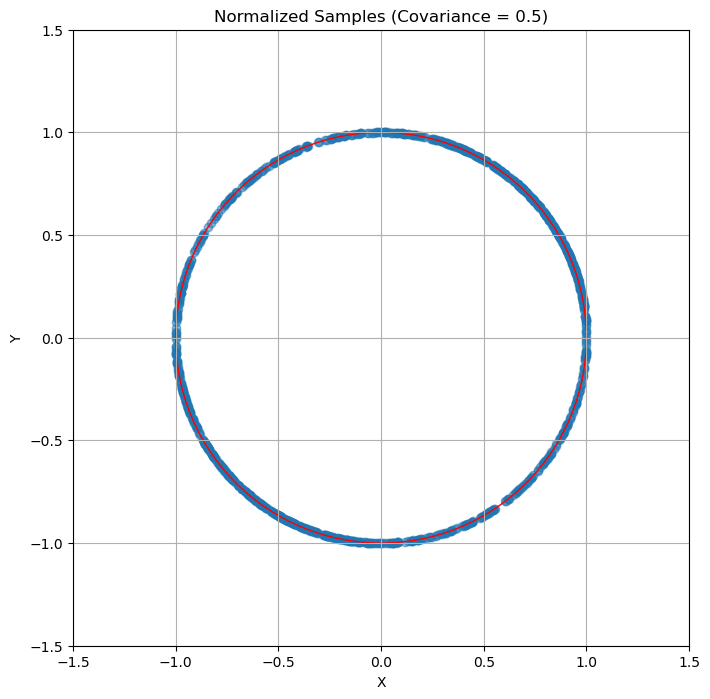

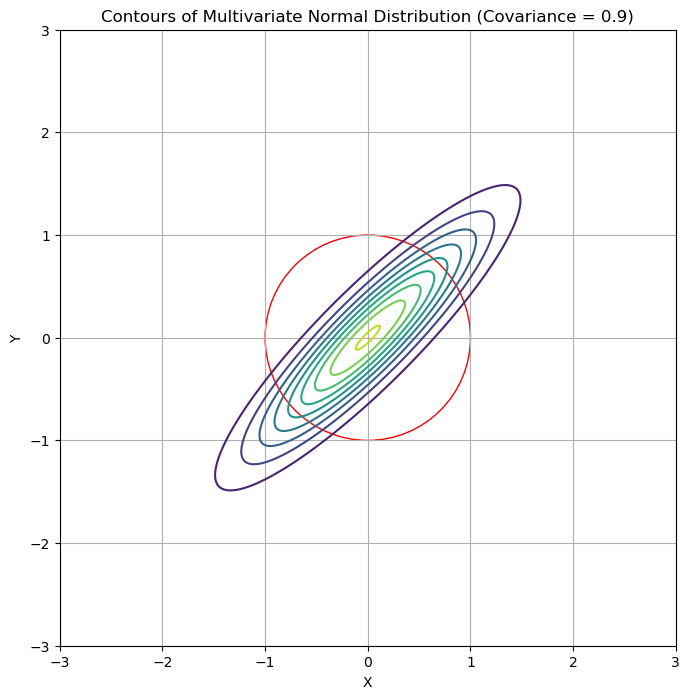

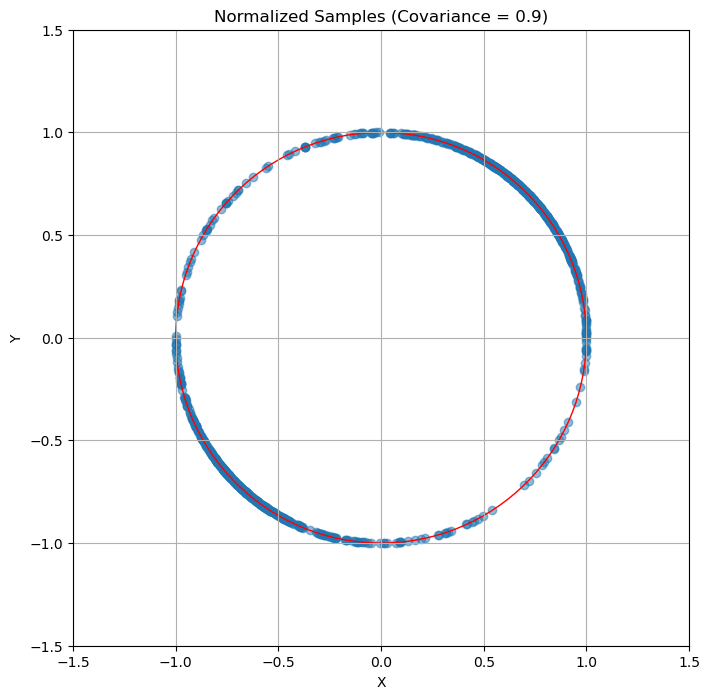

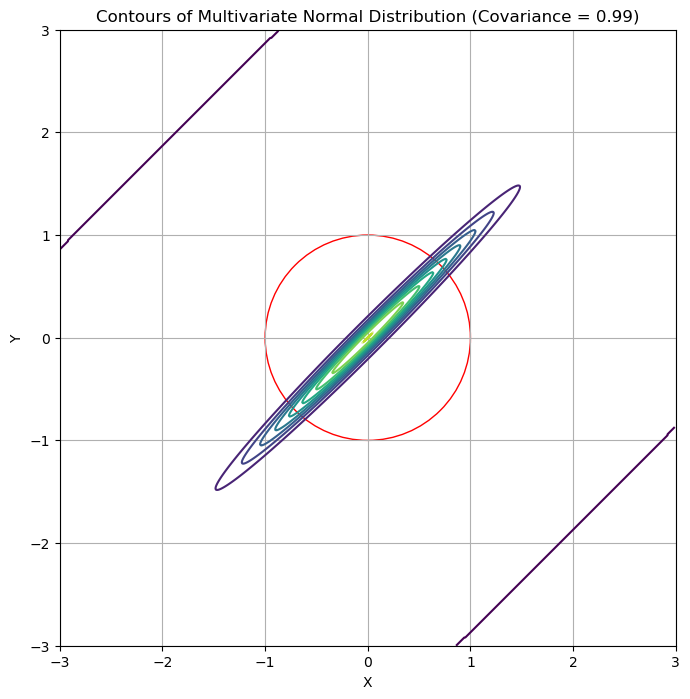

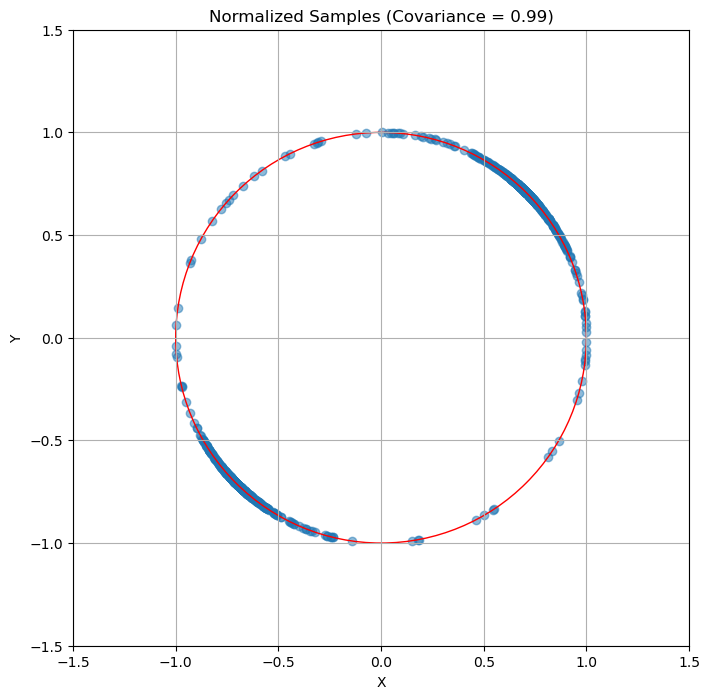

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Function to generate samples from multivariate normal distribution
def generate_samples(covariance):
    mean = [0, 0]
    size = 1000
    cov = [[1, covariance], [covariance, 1]]
    cov = cov/np.trace(cov)
    mvn = multivariate_normal(mean=mean, cov=cov)
    samples = mvn.rvs(size=size)
    return samples

# Plot contours of the normal distribution and overlay the unit circle
def plot_contours(covariance):
    x, y = np.mgrid[-3:3:.01, -3:3:.01]
    pos = np.dstack((x, y))
    mean = [0, 0]
    cov = [[1, covariance], [covariance, 1]]
    cov = cov/np.trace(cov)
    rv = multivariate_normal(mean, cov)
    
    plt.figure(figsize=(8, 8))
    plt.contour(x, y, rv.pdf(pos), levels=10, cmap='viridis')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    circle = plt.Circle((0, 0), 1, color='r', fill=False)
    plt.gca().add_artist(circle)
    plt.title('Contours of Multivariate Normal Distribution (Covariance = {})'.format(covariance))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Plot samples normalized to unit norm and overlay the unit circle
def plot_normalized_samples(covariance):
    samples = generate_samples(covariance)
    normalized_samples = samples / np.linalg.norm(samples, axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 8))
    plt.scatter(normalized_samples[:, 0], normalized_samples[:, 1], alpha=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    circle = plt.Circle((0, 0), 1, color='r', fill=False)
    plt.gca().add_artist(circle)
    plt.title('Normalized Samples (Covariance = {})'.format(covariance))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Plot for different covariance values
covariance_values = [0, 0.5, 0.9,0.99]
for covariance in covariance_values:
    plot_contours(covariance)
    plot_normalized_samples(covariance)
